In [ ]:
!pip install numpy --upgrade

     |████████████████████████████████| 15.7 MB 106 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

def GenerateA(M,N):
  A = np.random.normal(0,1,(M,N))
  SumCol = np.linalg.norm(A,axis=0)
  Anormed = A / SumCol[np.newaxis,:]
  return Anormed

print(GenerateA(2,3))

def SparseX(N,s):
  x = np.zeros(N)
  index = np.array(range(N))
  index1 = np.random.choice(index,s, replace = False)
  for i in index1:
    p = random.randint(0,1)
    if p == 0:
      x[i] = np.random.uniform(-10,-1)
    else:
      x[i] = np.random.uniform(1,10)
  return x,np.ndarray.tolist(index1)


print(SparseX(5,2))




[[-0.15836044  0.02121315 -0.87398   ]
 [ 0.98738137 -0.99977498 -0.48596189]]
(array([4.95510786, 0.        , 0.        , 6.71463608, 0.        ]), [0, 3])


In [ ]:
def least_square(A,y):
  out = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(A),A)),np.transpose(A)),y)
  #out = np.linalg.inv(np.dot(A.T, A)).dot(A.T).dot(y)
  return out

def omp(A,y):
  M = np.shape(A)[0]
  N = np.shape(A)[1]
  r = np.copy(y)
  x_k = np.zeros(N)
  indexSet = []
  err = np.linalg.norm(r)

  while err > 0.0001:
    lambdaK = np.argmax(np.abs(np.dot(np.transpose(A),r)))
    indexSet.append(lambdaK)

    DeltaK = A[:,indexSet]
    #print(DeltaK)
    #print(y)
    a_k = least_square(DeltaK,y)
    x_k[indexSet] = a_k

    r = y - np.dot(A,x_k)
    err = np.linalg.norm(r)
    #print(err)

  return x_k,indexSet

# A = GenerateA(5,10)
# x,index = SparseX(10,2)
# print("A: ", A)
# print("x: ", x)
# print(index)
# y = np.dot(A,x)

# x_k, i = omp(A,y)


In [119]:
def NoiselessCase(N,s_size,mc_time):
  M = range(1,N)
  S = range(1,s_size)

  plot_recover = np.zeros((len(M),len(S)))
  plot_normalError = np.zeros((len(M),len(S)))
  for m in M:
    A = GenerateA(m,N)

    for s in S:
      

      rec_count = 0
      normal_error = 0

      for i in range(mc_time):
        x, sparseIndex = SparseX(N,s)
        y = np.dot(A,x)
        
        x_k, recIndex = omp(A,y) 

        normal_error += np.linalg.norm(x-x_k)/np.linalg.norm(x)
        if len(sparseIndex) == len(recIndex):
          #print(recIndex,sparseIndex)
          if sorted(recIndex) == sorted(sparseIndex):
            rec_count+=1
        else:
          continue
        
        

      plot_recover[m-1,s-1] = rec_count/mc_time
      plot_normalError[m-1,s-1] = normal_error/mc_time

  return plot_recover,plot_normalError





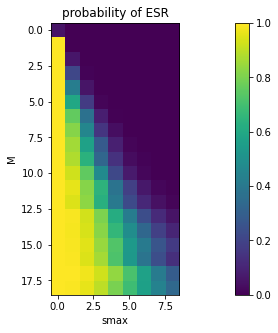

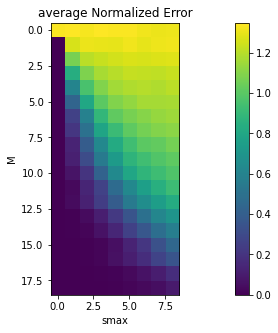

In [121]:
p, E = NoiselessCase(20,10,2000)
Figure1 = plt.figure(figsize = (5,5))
F1 = Figure1.add_subplot(1,1,1)
ESR = F1.imshow(p)
plt.colorbar(ESR,pad = 0.2)
F1.set_xlabel("smax")
F1.set_ylabel("M")
F1.title.set_text("probability of ESR")
plt.savefig('noiseless_20_ESR.png')

Figure2 = plt.figure(figsize = (5,5))
F2 = Figure2.add_subplot(1,1,1)
E = F2.imshow(E)
plt.colorbar(E,pad = 0.2)
F2.set_xlabel("smax")
F2.set_ylabel("M")
F2.title.set_text("average Normalized Error")

plt.savefig('noiseless_20_Err.png')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

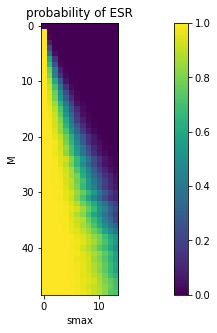

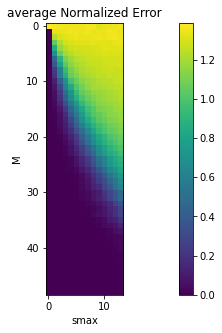

In [122]:
p, E = NoiselessCase(50,15,1500)
Figure1 = plt.figure(figsize = (5,5))
F1 = Figure1.add_subplot(1,1,1)
ESR = F1.imshow(p)
plt.colorbar(ESR,pad = 0.2)
F1.set_xlabel("smax")
F1.set_ylabel("M")
F1.title.set_text("probability of ESR")
plt.savefig('noiseless_50_ESR.png')

Figure2 = plt.figure(figsize = (5,5))
F2 = Figure2.add_subplot(1,1,1)
E = F2.imshow(E)
plt.colorbar(E,pad = 0.2)
F2.set_xlabel("smax")
F2.set_ylabel("M")
F2.title.set_text("average Normalized Error")

plt.savefig('noiseless_50_Err.png')

##Answer
As we can see from the ESR plot, when smax > M the plot sharply goes to zero, and when M is larger, the probability of each smax is larger, and the error is smaller.
And when the measurement goes larger the probability of exact match goes larger for bigger smaxs

In [ ]:
p, E = NoiselessCase(100,20,1000)
Figure1 = plt.figure(figsize = (5,5))
F1 = Figure1.add_subplot(1,1,1)
ESR = F1.imshow(p)
plt.colorbar(ESR,pad = 0.2)
F1.set_xlabel("smax")
F1.set_ylabel("M")
F1.title.set_text("probability of ESR")
plt.savefig('noiseless_100_ESR.png')

Figure2 = plt.figure(figsize = (5,5))
F2 = Figure2.add_subplot(1,1,1)
E = F2.imshow(E)
plt.colorbar(E,pad = 0.2)
F2.set_xlabel("smax")
F2.set_ylabel("M")
F2.title.set_text("average Normalized Error")

plt.savefig('noiseless_100_Err.png')